Capstone project
The last circuit we implemented in Qiskit was Grover’s algorithm for the solution |11>. For the capstone
project you will design and implement Grover’s algorithm for 4 qubits, which is equivalent to a 16 state
search space. You will implement this in Qiskit. The solution for the 4 qubit circuit is |0010>.

State of quantum circuit: Statevector([ 0.05078125+1.31293495e-16j,  0.05078125+6.81997048e-17j,
             -0.98046875-6.95078625e-16j,  0.05078125+7.57823437e-17j,
              0.05078125+1.37588644e-16j,  0.05078125+2.02711925e-17j,
              0.05078125+7.57823437e-17j,  0.05078125+1.26885535e-17j,
              0.05078125+3.35052353e-17j,  0.05078125+1.10476813e-16j,
              0.05078125+8.27212376e-17j,  0.05078125+1.02894174e-16j,
              0.05078125+8.27212376e-17j,  0.05078125+1.02894174e-16j,
              0.05078125+3.35052353e-17j,  0.05078125+1.10476813e-16j],
            dims=(2, 2, 2, 2))
['0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '0010', '1111', '0010', '0010', '0010

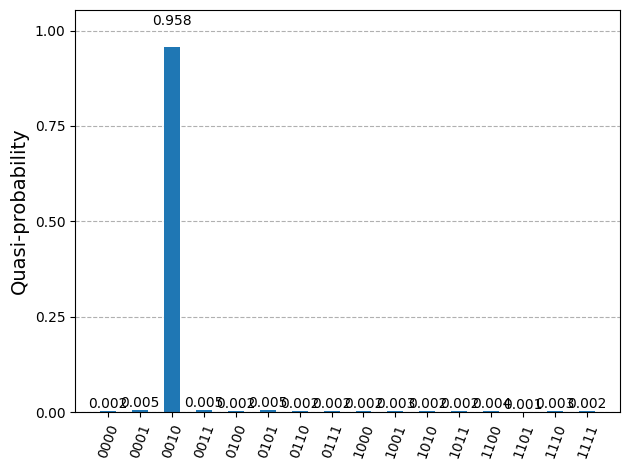

In [404]:
from qiskit import QuantumCircuit                         
from qiskit.quantum_info import Statevector               
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram       

grover_circ = QuantumCircuit(4)                          
iterator = 3 
# Reset all qubits to |0> state to ensure clean initial state
for qubit in range(4):     
    grover_circ.reset(qubit)  


#Applications of hadamar's gates
grover_circ.h([0,1,2,3])
# Flip control qubits to transform |010> to |111> so we can detect it with mcx = multi-controlled X gate
for _ in range(iterator):
    grover_circ.x(0)  
    grover_circ.x(2)  
    grover_circ.x(3)  
    # Apply the oracle: multi-controlled X with controls [q3,q2,q0] acting on q1 (target)
    grover_circ.h(1)
    grover_circ.mcx([0,2,3], 1)
    grover_circ.h(1)
    # Uncompute the flips (restore original basis)
    grover_circ.x(0)
    grover_circ.x(2)
    grover_circ.x(3)

    # DIFFUSER (inversion about the mean)
    # Step 1: Apply Hadamard to all qubits to go to uniform superposition
    grover_circ.h([0,1,2,3])

    # Step 2: Apply X to all but qubit 1 
    grover_circ.x([0,1,2,3])
    # Step 3: Apply multi-controlled-Z via mcx as controlled-X around middle qubit
    grover_circ.h(1)
    grover_circ.mcx([0,2,3], 1)
    grover_circ.h(1)
    # Step 4: Undo the X gates
    grover_circ.x([0,1,2,3])
    # Step 5: Apply Hadamard again to return to computational basis
    grover_circ.h([0,1,2,3])



# Get the full quantum statevector (before measurement)
stateV = Statevector(grover_circ) 

# Add measurement to all qubits
grover_circ.measure_all() 

# Run the circuit using statevector-based sampler
sampler = StatevectorSampler() 
shots = 1000
job = sampler.run([grover_circ], shots=shots)

result = job.result()[0]  # Get the result of sampling


state = result.data.meas.get_bitstrings()  # Extract bitstrings from measurement 


print("State of quantum circuit:", stateV) # Print the final quantum statevector 


print(state) # Print all measured bitstrings from the sampler


counts = result.data.meas.get_counts() # Get measurement counts (frequency of each bitstring)


prob_dict = {mate: c / shots for mate, c in counts.items()} # Convert counts to probability dictionary
print(prob_dict)


print(f"'0010': {counts.get('0010', 0)} from {shots} shots") # Highlight the count for the target state '0010' 


grover_circ.draw("mpl") # Draw the quantum circuit using matplotlib (works in Jupyter Notebooks)

plot_histogram({mate: c / shots for mate, c in counts.items()})

#print(grover_circ.draw()) # Draw ASCII version of the quantum circuit (for .py or terminal use)


State of quantum circuit: Statevector([ 0.05078125+6.22027115e-17j,  0.05078125-2.92429655e-17j,
              0.05078125+1.02596019e-16j,  0.05078125+6.91416054e-17j,
             -0.98046875-7.43949038e-16j,  0.05078125+4.13860298e-17j,
              0.05078125+4.83249237e-17j,  0.05078125-1.48738986e-18j,
              0.05078125+1.23903980e-17j,  0.05078125+3.44471359e-17j,
              0.05078125+4.13860298e-17j,  0.05078125-2.23040716e-17j,
              0.05078125+4.13860298e-17j,  0.05078125+7.48404431e-17j,
              0.05078125-1.53651777e-17j,  0.05078125-7.18622752e-18j],
            dims=(2, 2, 2, 2))
['0100', '0100', '0100', '0100', '0100', '0100', '0100', '1111', '0100', '0100', '0100', '0100', '0100', '0111', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100', '0100

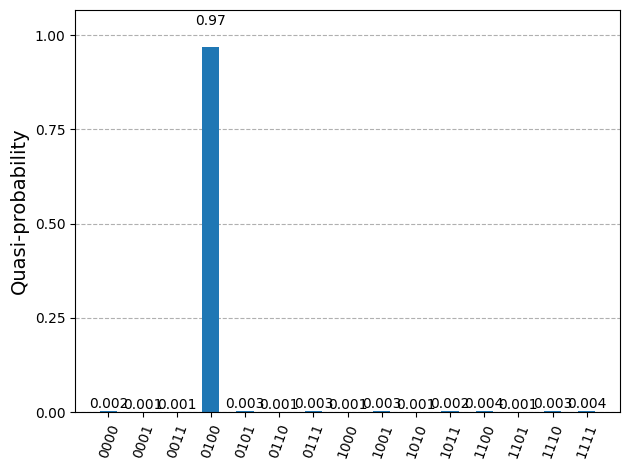

In [415]:
from qiskit import QuantumCircuit                         
from qiskit.quantum_info import Statevector               
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram       

grover_circ = QuantumCircuit(4)                          
iterator = 3 # success probability 

# Reset all qubits to |0> state to ensure clean initial state
for qubit in range(4):     
    grover_circ.reset(qubit)  

#Applications of hadamar's gates
grover_circ.h([0,1,2,3])
for _ in range(iterator): # success probability to perform better for the part of the circuit by multiple iteration
    # Flip control qubits to transform |0100> to |111> so we can detect it with mcx = multi-controlled X gate
    grover_circ.x(0)  
    grover_circ.x(1)  
    grover_circ.x(3)  
    grover_circ.h(2)
    # Apply the oracle: multi-controlled X with controls [q3,q2,q0] acting on q1 (target)
    grover_circ.mcx([3,1,0], 2)
    grover_circ.h(2)
    # Uncompute the flips (restore original basis)
    grover_circ.x(0)
    grover_circ.x(1)
    grover_circ.x(3)


    # DIFFUSER (inversion about the mean)
    # Step 1: Apply Hadamard to all qubits to go to uniform superposition
    grover_circ.h([0,1,2,3])

    # Step 2: Apply X to all but qubit 1 
    grover_circ.x([0,1,2,3])
    # Step 3: Apply multi-controlled-Z via mcx as controlled-X around middle qubit
    grover_circ.h(2)
    grover_circ.mcx([0,1,3], 2)
    grover_circ.h(2)
    # Step 4: Undo the X gates
    grover_circ.x([0,1,2,3])

    # Step 5: Apply Hadamard again to return to computational basis
    grover_circ.h([0,1,2,3])

# Get the full quantum statevector (before measurement)
stateV = Statevector(grover_circ) 

# Add measurement to all qubits
grover_circ.measure_all() 

# Run the circuit using statevector-based sampler
sampler = StatevectorSampler() 
shots = 1000
job = sampler.run([grover_circ], shots=shots)

result = job.result()[0]  # Get the result of sampling


state = result.data.meas.get_bitstrings()  # Extract bitstrings from measurement 


print("State of quantum circuit:", stateV) # Print the final quantum statevector 


print(state) # Print all measured bitstrings from the sampler


counts = result.data.meas.get_counts() # Get measurement counts (frequency of each bitstring)


prob_dict = {mate: c / shots for mate, c in counts.items()} # Convert counts to probability dictionary
print(prob_dict)


print(f"'0100': {counts.get('0100', 0)} from {shots} shots") # Highlight the count for the target state '0010' in qiskit the left most qbit is n-1 and 0 is the rightmost qbit so correct notation is '0100' for qiskit

grover_circ.draw("mpl") # Draw the quantum circuit using matplotlib (works in Jupyter Notebooks)
plot_histogram({mate: c / shots for mate, c in counts.items()})

#print(grover_circ.draw()) # Draw ASCII version of the quantum circuit (for .py or terminal use)
